In [3]:
import pandas as pd
import numpy as np
from plotnine import *

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import train_test_split # simple TT split cv

from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np


%matplotlib inline

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

import scipy.cluster.hierarchy as sch



Our group made made a number of changes to the Analysis Plan since #3. The first change was our dataset. We found that our original dataset did not contain a significant number of useful variables, and we wanted to utalize a heart disease data set that would allow us to throuroughly explore each of our questions. Our issue with the variables was that there were many binary and qualitative variables, but very few usable quantitative variables. This new dataset has a good mix of qualitative and quantitative variables, and allows us to conduct the depthful analysis we had hoped to achieve. 

We also reworded/altered a few of our questions after recieving feedback from both our instructor and our peers. The opportunity to gain this outside persective gave us valuable insight into alterations we could make to our analysis plan in order to generate the best results.

Question 1) We decided to utalize question 3 from the analysis plan as our first question, as this was a great baseline to understand which coefficients were strongest. We also planned to use this logistic regression model throughout the remainder of the analysis. 

Question 2) We added a KNN model to determine which model was most successful at predicting heart disease (Logistic Regression vs KNN). 

Question 3) We utalized question 4 from the analysis plan with a few modifications. First off, we created three age groups rather than five due to the variation in number of data for some of the age groups. We also decided to utalize Accuracy and ROC/AUC to determine the accuracy for each age group.

Question 4) We used question 5 from the analysis plan. We decided to change the variables we were clustering with our new data set to Cholesterol and Max HR. We also decided to implement scatter plots to visualize how the variables are related to one another. 

Question 5) For question 5, we wanted to add a decision tree to see how successful it would be at making classifications. 

Question 6) For question 6, we made numerous altercations to improve our PCA model. We took out the categorical models from the PCA, selecting a subset of continuous variables and a few binary variables. We also added a 90% threshold to determine how many principal components we needed to achieve this threshold. Finally, we used the selected principal components to build a new logistic regression model. We then compared the accuracy of this model to the accuracy of the logistic regression model with the original variables. 

We also added ggplot visualizations to each question in order to enhance the analysis. 


**Preliminary Loading and Cleaning of the Dataset**

In [4]:
#read in data 
DF = pd.read_csv("Heart_Disease_Prediction.csv")

#clean data
DF.dropna()

#create dummy variable for heart disease (we will be using heart disease presence)
DF = pd.get_dummies(DF, columns = ["Heart Disease"])
DF


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease_Absence,Heart Disease_Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,0,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,0,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1,0


**QUESTION 1: Which of the following variables is the strongest predictor of Heart Disease(Age, Sex, Chest pain 
type, BP, cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, slope of ST, thallium number of vesesels fluro)? What led to this conclusion?**

First, lets gain an understanding of our dataset. Lets take a look at the distribution of Ages in our dataset.

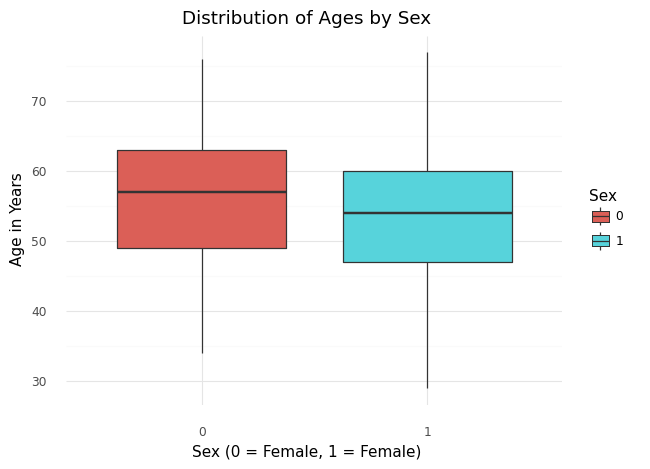

<ggplot: (8776364310447)>

In [5]:
(ggplot(DF, aes(x = "factor(Sex)", y = 'Age', fill = "factor(Sex)")) + geom_boxplot() + 
 theme_minimal() + 
 xlab('Sex (0 = Female, 1 = Female)') + 
 ylab('Age in Years') + 
 ggtitle('Distribution of Ages by Sex') +
 guides(fill = guide_legend(title = 'Sex')))

The above boxplot is a visual representation of the distribution of ages by sex. 

From the visualization,  it appears that the mean age is slightly higher for the Female group. How many males/females are there in our dataset?

In [6]:
print(np.unique(DF['Sex'], return_counts = True))

(array([0, 1]), array([ 87, 183]))


Thre are 183 Males in our dataset and 87 Females in our dataset. Undestanding your dataset is imporant before performing analysis; so now that we know a little more about our data, lets begin with the models.

       Coefs                    Names  Odds Coef
0  -0.016537                      Age   0.983599
1   1.125363                      Sex   3.081334
2   0.584415          Chest pain type   1.793942
3   0.414544                       BP   1.513680
4   0.303510              Cholesterol   1.354606
5  -0.350877             FBS over 120   0.704070
6   0.087396              EKG results   1.091328
7  -0.373817                   Max HR   0.688103
8   1.231587          Exercise angina   3.426665
9   0.181508            ST depression   1.199025
10  0.442442              Slope of ST   1.556504
11  0.374381                 Thallium   1.454091
12  0.909533  Number of vessels fluro   2.483163


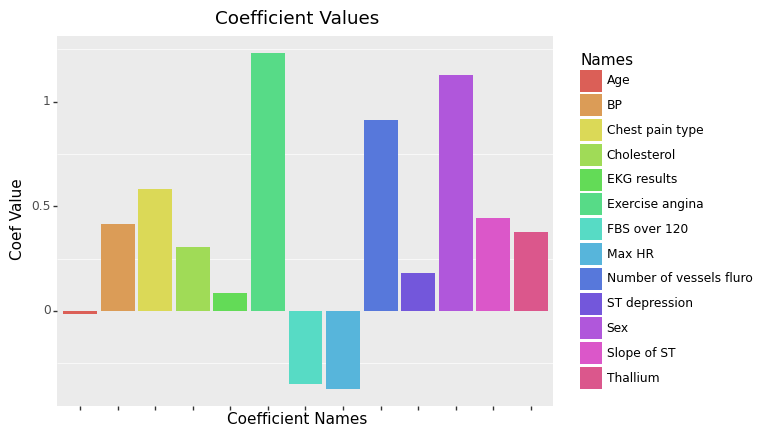

<ggplot: (8776361593652)>

In [7]:
# Create logistic regression model

preds = ["Age", "Sex", "Chest pain type", "BP", "Cholesterol", "FBS over 120", "EKG results", "Max HR", "Exercise angina", 
         "ST depression", "Slope of ST", "Thallium", "Number of vessels fluro"]

cont = ["BP", "Cholesterol", "Max HR", "ST depression", "Number of vessels fluro"]

X = DF[preds]
y = DF["Heart Disease_Presence"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

# zscore
z = StandardScaler()
X_train[cont] = z.fit_transform(X_train[cont])
X_test[cont] = z.transform(X_test[cont])

# create and fit model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# create dataframes with coefficients
coef = pd.DataFrame({"Coefs": lr.coef_[0],
                    "Names": preds})

coef["Odds Coef"] = np.exp(coef["Coefs"])
coef

print(coef)

# create bar chart to represent the coefs
(ggplot(coef, aes(x = "Names", y = "Coefs", fill = "Names")) + geom_bar(stat = "identity") + 
 ggtitle("Coefficient Values") + 
 labs(x = "Coefficient Names", y = "Coef Value") + 
 theme(axis_text_x = element_blank(),
       panel_grid_major_y = element_blank(),
       panel_grid_major_x = element_blank()))


The above bar graph visually represents the coefficient values for each variable. As we can see, Age is the lowest coefficient value while Exercise Angina and Sex are the highest. Further, FBS over 120 and Max HR have negative coefficients.  

*ANSWER TO QUESTION 1*

Out of all 13 of our predictors, Exercise Angina, Sex, Number of Vessels Fluro
are all signifcant variables. However, Exercise Angina is the strongest predictor of heart disease. You can visaully see this from our bar graph of our coeficcients. Exercise Angina has the largest coefficent value. In order to better interpret our coefficients, we turned them into odds coefficients in order to view each of the variables as a multiplier. The interpretation of Exercise Angina's coefficicent is that the presence of exercise angina means a person is 3.43 times more likely to have a heart disease. This answer makes sense because exercise angina is a very good indicator as to whether someone has heart disease or not. Exercise angina is pain in the chest that comes with exercise that can feel like a pressure, heaviness, and/or tightness in the chest.

**QUESTION 2: If a KNN is created with the same predictors as the model above, will the KNN or Logistic Regression model perform better? What lead to this conclusion?** 

KNN Train Confusion Matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb681309550>
KNN Training Accuracy 0.8253968253968254
KNN Training ROC/AUC:  0.8997165532879818


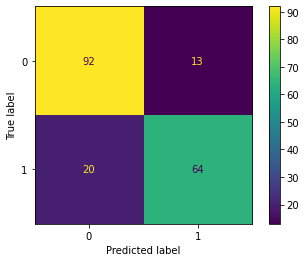

In [8]:
# Creating KNN Model
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

# Creating Predictions
KNN_predtrain = knn.predict(X_train)
KNN_predtest = knn.predict(X_test)


print("KNN Train Confusion Matrix: ", plot_confusion_matrix(knn, X_train, y_train))
print("KNN Training Accuracy", accuracy_score(y_train, KNN_predtrain))
print("KNN Training ROC/AUC: ", roc_auc_score(y_train, knn.predict_proba(X_train)[:,1]))

KNN Test Confusion Matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb67e8c2a60>
KNN Testing Accuracy:  0.7777777777777778
KNN Testing ROC/AUC:  0.8074074074074074


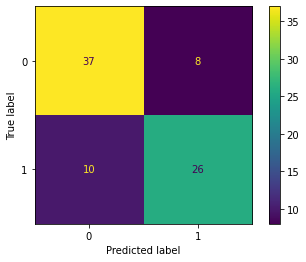

In [9]:
print("KNN Test Confusion Matrix: ", plot_confusion_matrix(knn, X_test, y_test))
print("KNN Testing Accuracy: ", accuracy_score(y_test, KNN_predtest))
print("KNN Testing ROC/AUC: ", roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))

Logistic Train Accuracy :  0.8677248677248677
Logistic Train ROC/AUC:  0.9311791383219955
Logistic Test Accuracy :  0.8395061728395061
Logistic Test ROC/AUC:  0.9092592592592592
Train Confusion matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb67ea3d970>
Test Confusion matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb67e827d60>


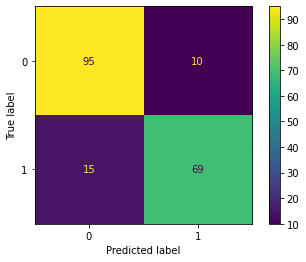

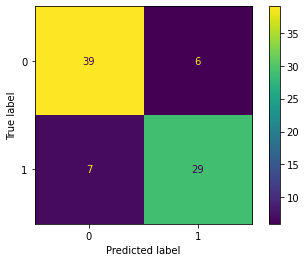

In [10]:
# Predictions and accuracy for Logistic Model

# Making Preds
trainpredvals = lr.predict(X_train)
print("Logistic Train Accuracy : ", accuracy_score(y_train, trainpredvals))
print("Logistic Train ROC/AUC: ", roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]))

testpredvals = lr.predict(X_test)
print("Logistic Test Accuracy : ", accuracy_score(y_test, testpredvals))
print("Logistic Test ROC/AUC: ", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

#print confusion matrices
print("Train Confusion matrix: ", plot_confusion_matrix(lr, X_train, y_train))
print("Test Confusion matrix: ", plot_confusion_matrix(lr, X_test, y_test))

Graph of Accuracy Scores for KNN Model vs. Logisitic Model


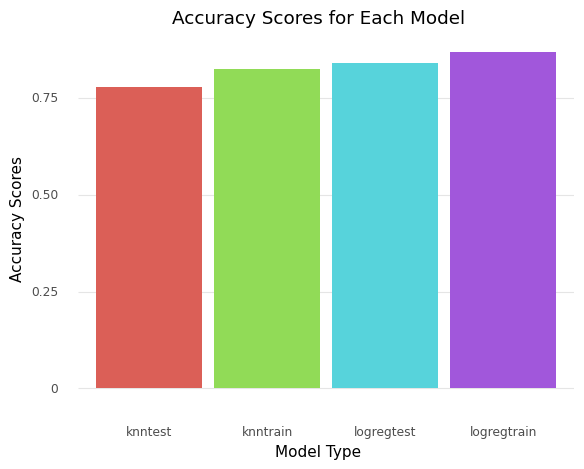

In [11]:
knntrain = accuracy_score(y_train, KNN_predtrain)
knntest = accuracy_score(y_test, KNN_predtest)
logregtrain = accuracy_score(y_train, trainpredvals)
logregtest = accuracy_score(y_test, testpredvals)

knntrain1 = roc_auc_score(y_train, knn.predict_proba(X_train)[:,1])
knntest1 = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
logregtrain1 = roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])
logregtest1 = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

# Creating New Dataframes for Later Use
model = ["logregtrain", "logregtest", "knntrain", "knntest"]

accuracy = [logregtrain, logregtest, knntrain, knntest]
roc_auc = [logregtrain1, logregtest, knntrain, knntest]

newDF = pd.DataFrame({"ModelType": model, "Accuracy": accuracy})
newDF2 = pd.DataFrame({"ModelType": model, "ROC/AUC": roc_auc})


# Printing Visualizations
print("Graph of Accuracy Scores for KNN Model vs. Logisitic Model")
print((ggplot(newDF, aes(x = "ModelType", y = "Accuracy", fill = "ModelType")) + 
 geom_bar(stat = "identity") + 
 labs(x = "Model Type", y = "Accuracy Scores") + 
 ggtitle("Accuracy Scores for Each Model") +
 theme_minimal() +
 theme(panel_grid_major_x = element_blank(),
     panel_grid_minor_x = element_blank(),
      panel_grid_minor_y = element_blank(),
      legend_position = "none")))



The bar graph above displays the accuracy scores for each type of model (knn test set, knn train set, logisistic regression test set, and logistic regression train set). As we can see, the logistic regression train set had the highest accuracy score, while the knn test model had the lowest accuracy score. Further, we can see that the logistic regression train and test sets outperform both of the knn models. 

Graph of ROC/AUC Scores for KNN Model vs. Logisitic Model


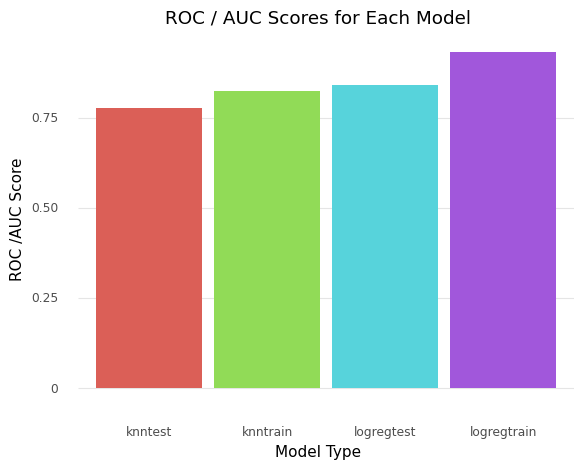

In [12]:
print("Graph of ROC/AUC Scores for KNN Model vs. Logisitic Model")
print((ggplot(newDF2, aes(x = "ModelType", y = "ROC/AUC", fill = "ModelType")) + 
 geom_bar(stat = "identity") + 
 labs(x = "Model Type", y = "ROC /AUC Score") + 
 ggtitle("ROC / AUC Scores for Each Model") +
 theme_minimal() +
 theme(panel_grid_major_x = element_blank(),
     panel_grid_minor_x = element_blank(),
      panel_grid_minor_y = element_blank(),
      legend_position = "none")))

The bar graph above displays the ROC/AUC scores for each type of model (knn test set, knn train set, logisistic regression test set, and logistic regression train set). As we can see, the logistic regression train set had the highest ROC/AUC score, while the knn test model had the lowest ROC/AUC score. Further, we can see that the logistic regression train and test sets outperform both of the knn models. 

*ANSWER TO QUESTION 2:* 

In order to answer this question, we needed to create a KNN model, and then compare how it performs to our Logistic Model we created in question 1. We decided that we were going to compare the accuracies of the two models (how good our model was at predicting heart disease). The training accuracy for our newly created KNN model was 0.8254 and our testing accuracy was 0.7778. This means that on data that our KNN model has never seen (like in a real life application), it predicts the presense of Heart Disease correctly roughly 78% of the time. 

This is a great score, however, we did the same steps for the Logistic Model we created in question 1 and the accuracy scores were a bit higher. This is shown in the graph of accuracy scores. Our Logistic Model had a training accuracy of 0.8677 and a testing accuracy of 0.8395; meaning our Logistic Model predicts Heart Disease correclty roughly 84% of the time on unseen data (like in a real life application). 

Not only is our Logistic Model more accurate then our KNN model (as seen by the accuracy scores and confusion matrices), but it is also less overfit. A model is deemed overfit if it performs so good on training data that when it is exposed to unseen data, it suffers in accuracy. In data science, we want to avoid this at all costs because it can cause a model to get completely thrown out. Our KNN model had nearly a 5% deviation from its training and testing accuracy, while our Logistic Model had just under a 3% deviation in training and testing accuracy. Beacuse of this, we concluded that our KNN model is more overfit than our Logistic Regression Model.


Based on these accuracy scores, we determined the our Logisitc Model was the better model at predciting Heart Disease.

**QUESTION 3:**

 Is there variance in the accuracy of our model for people of different age groups (i.e. for our logistic regression model, is there a significantly higher accuracy score for any age groups < 30, 30-39, 40-49, etc.) If so, how could this impact the reliability of our model and our dataset and how can this be overcome?

Accuracy < 50 :  0.9166666666666666
Accuracy 50-59 :  0.7878787878787878
Accuracy 60+ :  0.8636363636363636
Confusion matrices: 
< 50 


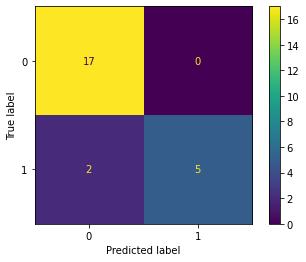

In [13]:
#create groups for the different age ranges
#group <= 29
group1 = (X_test["Age"] < 50)
group2 = (X_test["Age"] >= 50) & (X_test["Age"] < 59)
group3 = (X_test["Age"] >= 60)

#predict for each age group using the logistic regrssion model from question 1
pred1 = lr.predict(X_test[preds].loc[group1])
pred2 = lr.predict(X_test[preds].loc[group2])
pred3 = lr.predict(X_test[preds].loc[group3])

#plot metrics to compare accuracy between age groups
print("Accuracy < 50 : ", accuracy_score(y_test.loc[group1], pred1))
print("Accuracy 50-59 : ", accuracy_score(y_test.loc[group2], pred2))
print("Accuracy 60+ : ", accuracy_score(y_test.loc[group3], pred3))

#print confusion matrices
print("Confusion matrices: ")
print("< 50 ")
plot_confusion_matrix(lr, X_test.loc[group1], y_test.loc[group1])


50-59


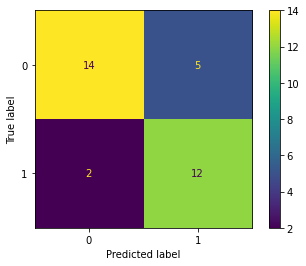

In [14]:
print("50-59")
plot_confusion_matrix(lr, X_test.loc[group2], y_test.loc[group2])

50-59


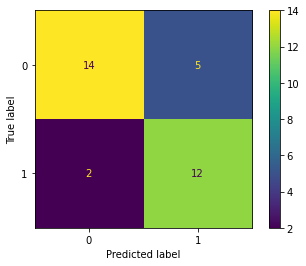

In [15]:
print("50-59")
plot_confusion_matrix(lr, X_test.loc[group2], y_test.loc[group2])

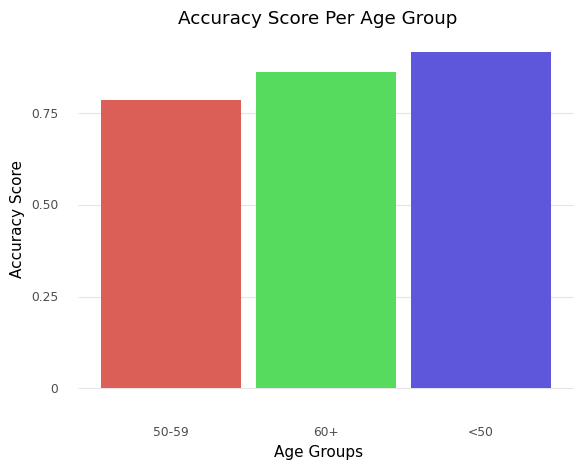

<ggplot: (8776361286033)>

In [16]:
accscorebelow50 = accuracy_score(y_test.loc[group1], pred1)
accscore50to59 = accuracy_score(y_test.loc[group2], pred2)
accscore60plus = accuracy_score(y_test.loc[group3], pred3)

# Visualiations for the accuracy for each age group
agegroups = ["<50", "50-59", "60+"]
accuracyscores = [accscorebelow50, accscore50to59, accscore60plus]

newDF = pd.DataFrame({"agegroups": agegroups, "accuracyscores": accuracyscores})

(ggplot(newDF, aes(x = "agegroups", y = "accuracyscores", fill = "agegroups")) + 
 geom_bar(stat = "identity") + 
 labs(x = "Age Groups", y = "Accuracy Score") + 
 ggtitle("Accuracy Score Per Age Group") +
 theme_minimal() +
 theme(panel_grid_major_x = element_blank(),
     panel_grid_minor_x = element_blank(),
      panel_grid_minor_y = element_blank(),
      legend_position = "none"))



The bar graph above visually demonstrates the accuracy scores for each age group. From the bar graph, we can see that the model had the highest accuracy score when predicting ages < 50, and the lowest accuracy score when predicting models 50-59. 

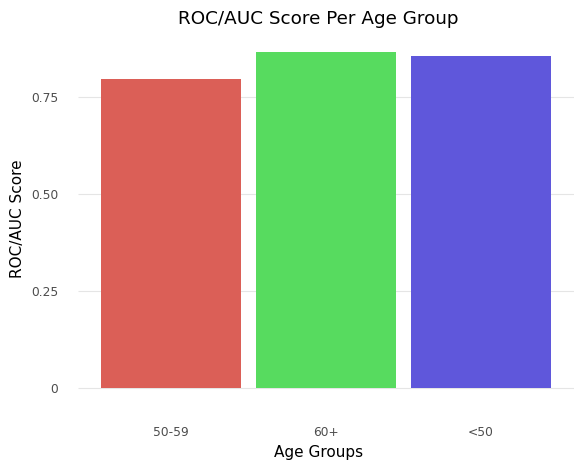

<ggplot: (8776361286765)>

In [17]:
# Visualiations of the ROC/AUC for each age group
rocscorebelow50 = roc_auc_score(y_test.loc[group1], pred1)
rocscore50to59 = roc_auc_score(y_test.loc[group2], pred2)
rocscore60plus = roc_auc_score(y_test.loc[group3], pred3)

rocscores = [rocscorebelow50, rocscore50to59, rocscore60plus]

newDF = pd.DataFrame({"agegroups": agegroups, "accuracyscores": rocscores})

(ggplot(newDF, aes(x = "agegroups", y = "rocscores", fill = "agegroups")) + 
 geom_bar(stat = "identity") + 
 labs(x = "Age Groups", y = "ROC/AUC Score") + 
 ggtitle("ROC/AUC Score Per Age Group") +
 theme_minimal() +
 theme(panel_grid_major_x = element_blank(),
     panel_grid_minor_x = element_blank(),
      panel_grid_minor_y = element_blank(),
      legend_position = "none"))

The bar graph above visually demonstrates the ROC/AUC scores for each age group. From the bar graph, we can see that the model had the highest ROC/AUC score when predicting ages > 60, and the lowest ROC/AUC score when predicting models 50-59. 

*ANSWER TO QUESTION 3*

There is variance in the accuracy of our model for individuals in different age groups. We were able to come to this conclusion by splitting our age varaible into three seperate groups - less than 50, ages 50 to 59, and 60 plus - and comparing all three accuracies. Age group less than 50 and greater than 60 were our two highest accuracies. Heart Disease is less common for younger subject and more common for older subjects, so this may be why out model struggles more with those in that middle age group between 50 and 59. Further, when looking at the ROC/AUC values for each age group, we can see that the age group 60+ has the highest ROC/AUC score, and the 50 to 59 age group is still the lowest.

The difference in these three accuracies could potentially effect our models reliability. Due to the importance of accuracy classifying heart disease, with the result possibly being the difference between life and death, it would not be wise to utalize this model when there is varying accuracy for different age groups. To combat this, it would be helpful to re-train our model on a larger dataset than has a roughly equal number of participants in each age group. 


**QUESTION 4:**

 When clustering Cholesterol and MAX HR, what sort of clusters emerge, and are there significant patterns that may characterize the clusters? What clustering method is most successful, and why is this likely the case? What is likely the driver behind the formation of these clusters, and what characteristics describe these clusters? Further, how do these clusters help explain the variables and their relation to Heart Disease?

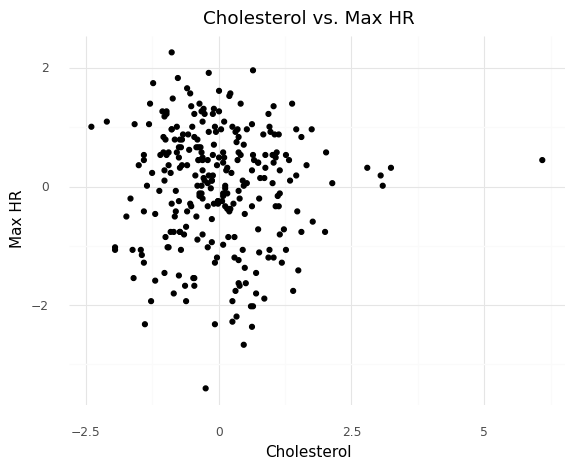

<ggplot: (8776361259692)>

In [18]:
#plot predictors to visually assess which clustering model will potentially be the best fit
features = ["Cholesterol", "Max HR"]
X2 = DF[features]

#zscore
z = StandardScaler()
X2[features] = z.fit_transform(X2[features])

#create scatter plot
(ggplot(X2, aes(x = "Cholesterol", y = "Max HR")) + geom_point() + 
 theme_minimal() + labs(title = "Cholesterol vs. Max HR"))

The scatterplot above demonstrates the relationship between Cholesterol and Max HR in the data set. 

{'icoord': [[35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [15.0, 15.0, 32.5, 32.5], [55.0, 55.0, 65.0, 65.0], [23.75, 23.75, 60.0, 60.0], [75.0, 75.0, 85.0, 85.0], [95.0, 95.0, 105.0, 105.0], [165.0, 165.0, 175.0, 175.0], [155.0, 155.0, 170.0, 170.0], [145.0, 145.0, 162.5, 162.5], [135.0, 135.0, 153.75, 153.75], [125.0, 125.0, 144.375, 144.375], [115.0, 115.0, 134.6875, 134.6875], [100.0, 100.0, 124.84375, 124.84375], [215.0, 215.0, 225.0, 225.0], [205.0, 205.0, 220.0, 220.0], [195.0, 195.0, 212.5, 212.5], [185.0, 185.0, 203.75, 203.75], [112.421875, 112.421875, 194.375, 194.375], [235.0, 235.0, 245.0, 245.0], [255.0, 255.0, 265.0, 265.0], [240.0, 240.0, 260.0, 260.0], [275.0, 275.0, 285.0, 285.0], [250.0, 250.0, 280.0, 280.0], [325.0, 325.0, 335.0, 335.0], [315.0, 315.0, 330.0, 330.0], [305.0, 305.0, 322.5, 322.5], [295.0, 295.0, 313.75, 313.75], [265.0, 265.0, 304.375, 304.375], [345.0, 345.0, 355.0, 355.0], [365.0, 365.0, 375.0, 375.0], [350.0, 350.0, 370.0, 370.0], [395.0, 39

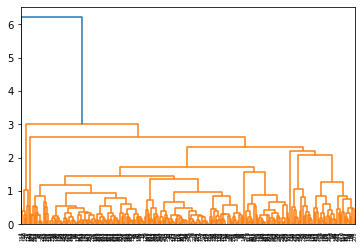

In [19]:
#Agglomerative Clustering
predictors = ['Cholesterol', 'Max HR']

X1 = DF[predictors]

z = StandardScaler()
X1[predictors] = z.fit_transform(X1[predictors])

hac = AgglomerativeClustering(affinity = "euclidean",
                              linkage ='average',
                              n_clusters = 2)


hac.fit(X1)

# Dendrogram
dendro = sch.dendrogram(sch.linkage(X1, method = 'average'))
print(dendro)

# Silhouette Escore
membership = hac.labels_
print("Silhouette Score: ", silhouette_score(X1, membership))


Silhouette Score:  0.372010963946033


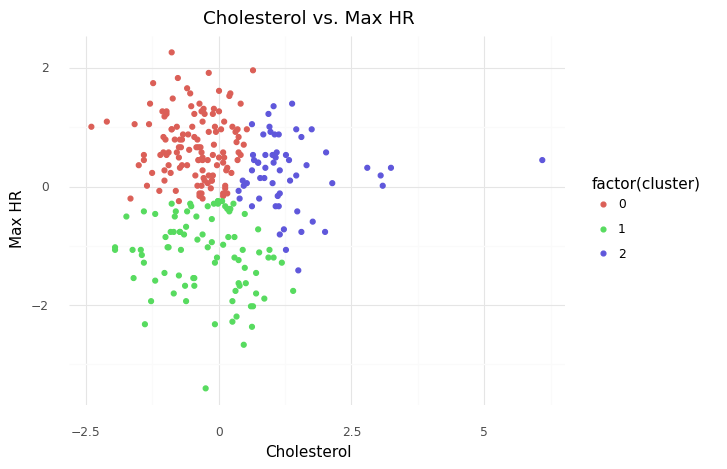

<ggplot: (8776361062340)>

In [20]:
#KMEANS
features = ["Cholesterol", "Max HR"]
X2 = DF[features]

#zscore
z = StandardScaler()
X2[features] = z.fit_transform(X2[features])

#km
km = KMeans(n_clusters = 3)
km.fit(X2[features])

membership = km.predict(X2[features])
X2["cluster"] = membership

#evaluate model
print("Silhouette Score: " , silhouette_score(X2[features], membership))

#plot
(ggplot(X2, aes(x = "Cholesterol", y = "Max HR", color = "factor(cluster)")) +
 geom_point() + theme_minimal() + labs(title = "Cholesterol vs. Max HR"))


The scatterplot above demonstrates the clusters obtained from the KMeans model.

Silhouette Score:  0.3605276137121836


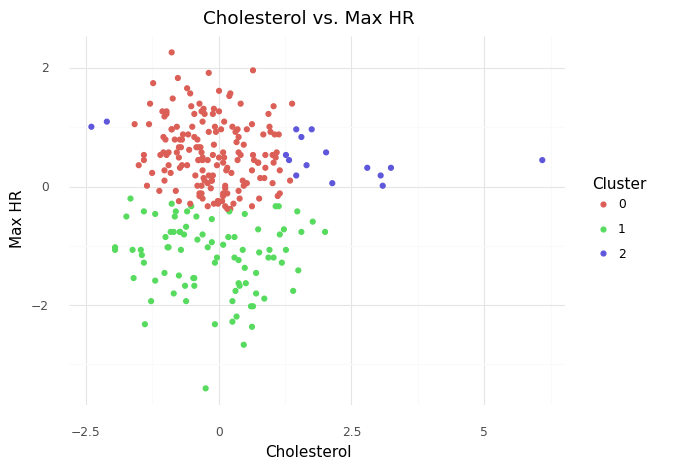

<ggplot: (8776361056859)>

In [21]:
#Gaussian Mixture Model
X3 = DF[["Cholesterol", "Max HR"]]

z = StandardScaler()
X3[["Cholesterol", "Max HR"]] = z.fit_transform(X3)

gmm = GaussianMixture(n_components = 3)
gmm.fit(X3)

X3["cluster"] = gmm.predict(X3)

print("Silhouette Score: ", silhouette_score(X3[features], X3["cluster"]))

(ggplot(X3, aes(x = "Cholesterol", y = "Max HR", color = "factor(cluster)")) + geom_point() + 
 theme_minimal() + labs(title = "Cholesterol vs. Max HR") +
 scale_color_discrete(name = "Cluster"))

The scatterplot above demonstrates the clusters found between Max HR and Cholesterol from the GMM model.

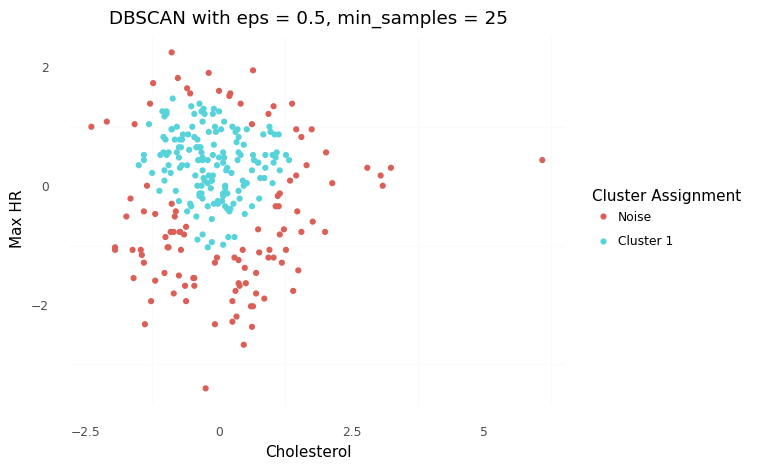


DBCAN Silhouette Score:  0.2491147835771584


In [22]:
#DBSCAN
features = ["Cholesterol", "Max HR"]
X4 = DF[features]

#zscore
z = StandardScaler()
X4[features] = z.fit_transform(X2[features])


db = DBSCAN(eps = 0.5, min_samples = 25)
db.fit(X4[features])

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db.labels_)))]

X4["assignments"] = db.labels_

print((ggplot(X4, aes(x = "Cholesterol", y = "Max HR", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25")))

print("DBCAN Silhouette Score: ", silhouette_score(X4[["Cholesterol","Max HR"]], X4["assignments"]))

The scatterplot above demonstrates the clusters found between Max HR and Cholesterol from the DBSCAN model with EPS = 0.5 and min_samples = 25. 

**QUESTION 5:** 

When running a decision tree on our data, how many leaves is our tree made up of? How deep is our tree? How accurate is the model running? Is our tree overfit? How can we tell?

In [23]:
# Decision Tree
feats = ["Age", "Sex", "Chest pain type", "BP", "Cholesterol", "FBS over 120", "EKG results", "Max HR", "Exercise angina", 
         "ST depression", "Slope of ST", "Thallium", "Number of vessels fluro"]

X7 = DF[feats]

# Splitting, Z-scoring
X_train, X_test, y_train, y_test = train_test_split(X7, y, test_size = 0.3,
                                                    random_state = 5)
z = StandardScaler()
z.fit(X_train[cont])

X_train[cont] = z.transform(X_train[cont])
X_test[cont] = z.transform(X_test[cont])

# Creating Model (Set min samples leaf to 10)
tree = DecisionTreeClassifier(min_samples_leaf = 10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [24]:
from traitlets.config.application import TRAITLETS_APPLICATION_RAISE_CONFIG_FILE_ERROR
# Printing tree metrics
print("Train Acc: ", accuracy_score(y_train, tree.predict(X_train)))
print("Test Acc: ", accuracy_score(y_test, tree.predict(X_test)))

trainacc = accuracy_score(y_train, tree.predict(X_train))
testacc = accuracy_score(y_test, tree.predict(X_test))

print("TEST Precision : ", precision_score(y_train, tree.predict(X_train)))
print("TRAIN Precision: ", precision_score(y_test, tree.predict(X_test)))

trainprec = precision_score(y_train, tree.predict(X_train))
testprec = precision_score(y_test, tree.predict(X_test))

print("TEST Recall : ", recall_score(y_test, tree.predict(X_test)))
print("TRAIN Recall: ", recall_score(y_train, tree.predict(X_train)))

trainrec = recall_score(y_train, tree.predict(X_train))
testrec = recall_score(y_test, tree.predict(X_test))

print("TEST ROC/AUC : ", roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))
print("TRAIN ROC/AUC: ", roc_auc_score(y_train, tree.predict_proba(X_train)[:,1]))

trainroc = roc_auc_score(y_train, tree.predict_proba(X_train)[:,1])
testroc = roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])

# Creating New Dataframes for use in visualizations
score = ["acctrain", "acctest", "prectrain", "prectest", "recalltrain", "recalltest"]
roc = ["testroc", "trainroc"]

accuracy = [trainacc, testacc, trainprec, testprec, trainrec, testrec]
roc_auc = [testroc, trainroc]

newDF = pd.DataFrame({"modeltype": score, "Accuracy": accuracy})
newDF2 = pd.DataFrame({"modeltype": roc, "ROC/AUC": roc_auc})


Train Acc:  0.8677248677248677
Test Acc:  0.8271604938271605
TEST Precision :  0.8933333333333333
TRAIN Precision:  0.8235294117647058
TEST Recall :  0.7777777777777778
TRAIN Recall:  0.7976190476190477
TEST ROC/AUC :  0.8283950617283949
TRAIN ROC/AUC:  0.9407596371882087


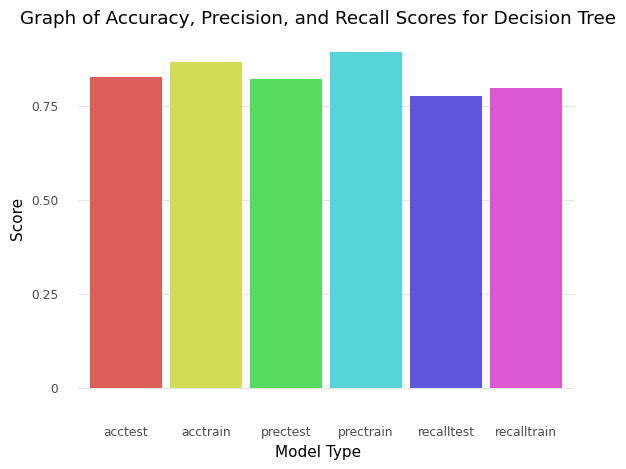

<ggplot: (8776361475750)>

In [25]:
(ggplot(newDF, aes(x = "score", y = "accuracy", fill = "score")) + 
 geom_bar(stat = "identity") + 
 labs(x = "Model Type", y = "Score") + 
 ggtitle("Graph of Accuracy, Precision, and Recall Scores for Decision Tree") +
 theme_minimal() +
 theme(panel_grid_major_x = element_blank(),
     panel_grid_minor_x = element_blank(),
      panel_grid_minor_y = element_blank(),
      legend_position = "none"))

The above bar graph demonstrates the accuracy scores, precision scores, and recall scores for both the train and test sets of the decision tree.

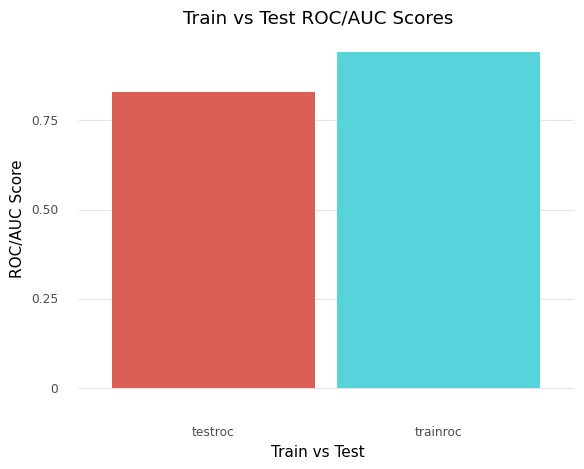

<ggplot: (8776361242164)>

In [26]:
(ggplot(newDF2, aes(x = "roc", y = "roc_auc", fill = "roc")) + 
 geom_bar(stat = "identity") + 
 labs(x = "Train vs Test", y = "ROC/AUC Score") + 
 ggtitle("Train vs Test ROC/AUC Scores") +
 theme_minimal() +
 theme(panel_grid_major_x = element_blank(),
     panel_grid_minor_x = element_blank(),
      panel_grid_minor_y = element_blank(),
      legend_position = "none"))

The bar graph above visually demonstrates the difference in the ROC/AUC scores between the train and test sets. 

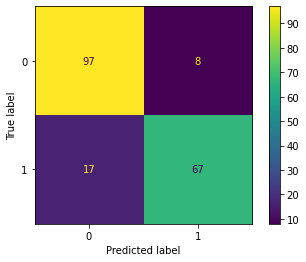

In [27]:
# Training Confusion Matrix for Tree
plot_confusion_matrix(tree, X_train, y_train)

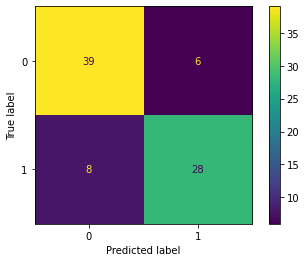

In [28]:
# Testing Confusion Matric for Tree
plot_confusion_matrix(tree, X_test, y_test) 

In [29]:
# Analyzing Depth of the Tree
print("Tree Depth: ", tree.get_depth())
print("Number of Leaves: ", tree.get_n_leaves())

Tree Depth:  4
Number of Leaves:  12


*ANSWER TO QUESTION 5*

In order to answer this question, we first have to make sure all imports are in order, and then we can begin creating our tree. We created this tree to predict the presense of Heart Disease based on all of our predictors using min leafs of 10. We then analyzed our accuracy, precision, recall, and ROC/AUC for training and testing data. In addtion to this, we printed our confusion matrices for both training and testing. The testing accuracy score for our tree was 0.8272, which means that it predicts Heart Disease correctly roughly 83 percent of the time on unseen data. 

We  know that tree is not overfit since our training and testing accuracy does not differ drastically; there is only a 4% deviation between the two accuracies.

We determined there were 12 leaves in our tree by using tree.get_n_leaves(), and found out that our tree had a depth of 4 by using tree.getdepth(). This means that our tree has four levels (depth) and a final count of 12 leaves at the bottom of our tree.







**QUESTION 6: When comparing a logistic regression model using PCA on all of the predictors retaining enough PCs to keep 90% of the variance to the logistic regression model with original variables in question 1, how much of a difference is there in the accuracy score when predicting heart disease? Should the PCs be utilized over the original predictors in this model?**

In [30]:
#PCA

df1vals = ["BP", "Cholesterol", "Max HR", "ST depression", "Number of vessels fluro", "Sex", "FBS over 120", "Heart Disease_Presence"]
features1 = ["BP", "Cholesterol", "Max HR", "ST depression", "Number of vessels fluro", "Sex", "FBS over 120"]
cont = ["BP", "Cholesterol", "Max HR", "ST depression", "Number of vessels fluro"]

df1 = pd.DataFrame(DF[df1vals])

#zscore
z = StandardScaler()
df1[cont] = z.fit_transform(df1[cont])

#PCA
pca = PCA()
pca.fit(df1[features1])

#PCA data frame
pcaDF = pd.DataFrame({"expl_var" :
                      pca.explained_variance_ratio_,
                      "pc": range(1,8),
                      "cum_var":
                      pca.explained_variance_ratio_.cumsum()})

pcaDF.head()

,expl_var,pc,cum_var
0,0.314298,1,0.314298
1,0.210028,2,0.524326
2,0.168823,3,0.693150
3,0.135346,4,0.828496
4,0.111524,5,0.940020


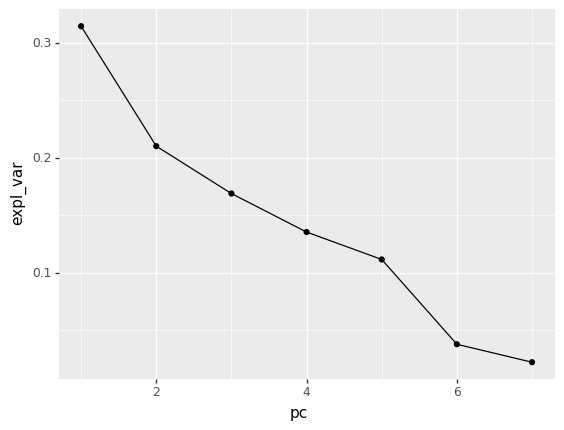

<ggplot: (8776361213980)>

In [31]:
#scree plot

(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

The model above is a scree plot that demonstrates the amount of variance explained by each principal component in descending order. 

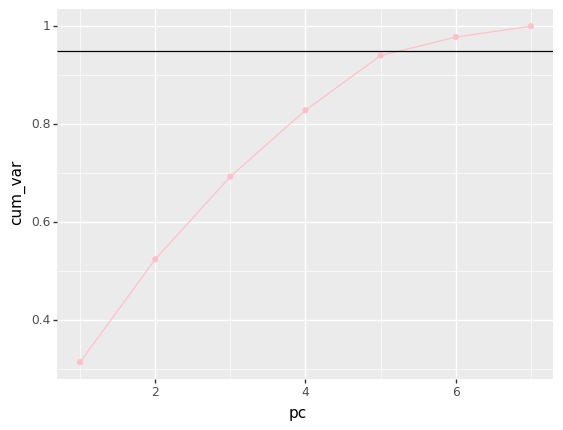

<ggplot: (8776361415641)>

In [32]:
#cum plot

(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.95))

The model above is a cumulative variance plot that demonstrates the total variance achieved by each principal components and the principal components before it. 

In [33]:
#need to keep 5 components to account for at least 90% of the variance
pcomps5 = pca.transform(df1[features1])
pcomps5 = pd.DataFrame(pcomps5[:,0:5])

# Model
lr2 = LogisticRegression()
lr2.fit(df1[features1], y)

print("5 PCs :" , lr2.score(df1[features1], y))

rawpredvals = lr.predict(X_test)
print("Raw Variable Accuracy : ", accuracy_score(y_test, rawpredvals))

pcpredvals = lr2.predict(X_test[features1])
print("PC Accuracy: ", accuracy_score(y_test, pcpredvals))

5 PCs : 0.8
Raw Variable Accuracy :  0.8395061728395061
PC Accuracy:  0.8148148148148148


*ANSWER TO QUESTION*

By comparing our logistic regression model with principal components to the logistic regression model with the original variables, we were able to determine that there was only a slight drop in accuracy for the model with principal components. We utalized PCA to create 5 principal components which retained slightly over 90% of the original variance. With our PC logistic regression model being so successful, we believe it would be wise to utilize the principal components over the original predictors in this model. With the use of the principal components, our model will be quicker and more efficient. 

REFERENCES:
https://www.geeksforgeeks.org/how-to-change-legend-title-in-ggplot2-in-r/

https://stackoverflow.com/questions/14622421/how-to-change-legend-title-in-ggplot
